In [ ]:
#APRIL HAMONANGAN MARBUN
#1103202039

In [36]:
# Mengimpor pustaka yang diperlukan
import pandas as pd  # Mengimpor Pandas untuk manipulasi data
from google.colab import drive  # Mengimpor modul drive dari Google Colab
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk membuat grafik
import seaborn as sns  # Mengimpor Seaborn untuk visualisasi data yang lebih menarik
import ipywidgets as widgets  # Mengimpor ipywidgets untuk elemen interaktif
from ipywidgets import interact  # Mengimpor fungsi interact dari ipywidgets
import numpy as np  # Mengimpor NumPy untuk komputasi numerik

# Menghubungkan Google Drive dengan Colab
drive.mount('/content/drive')

# Mendefinisikan path file CSV
file_path = '/content/diamonds.csv'

# Membaca data dari file CSV
datas = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari data
print(datas.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [37]:
# Menampilkan informasi data
datas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [38]:
# Daftar fitur yang akan dianalisis
features = ['carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

# Loop melalui setiap fitur dan mencetak jumlah nilai unik
for feature in features:
    unique_count = datas[feature].nunique()  # Menghitung jumlah nilai unik
    print(f"Jumlah unique value for {feature}: {unique_count}")


Jumlah unique value for carat: 272
Jumlah unique value for cut: 5
Jumlah unique value for clarity: 8
Jumlah unique value for depth: 181
Jumlah unique value for table: 126
Jumlah unique value for price: 11297
Jumlah unique value for x: 553
Jumlah unique value for y: 551
Jumlah unique value for z: 371


In [39]:
# Daftar fitur numerik
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Daftar fitur kategori
categorical_features = ['cut', 'color', 'clarity']

# Daftar fitur target
target = ['price']

# Mencetak daftar fitur numerik
print("Numerical Features: ", numerical_features)

# Mencetak daftar fitur kategori
print("Categorical Features: ", categorical_features)

# Mencetak daftar fitur target
print("Target: ", target)


Numerical Features:  ['carat', 'depth', 'table', 'x', 'y', 'z']
Categorical Features:  ['cut', 'color', 'clarity']
Target:  ['price']


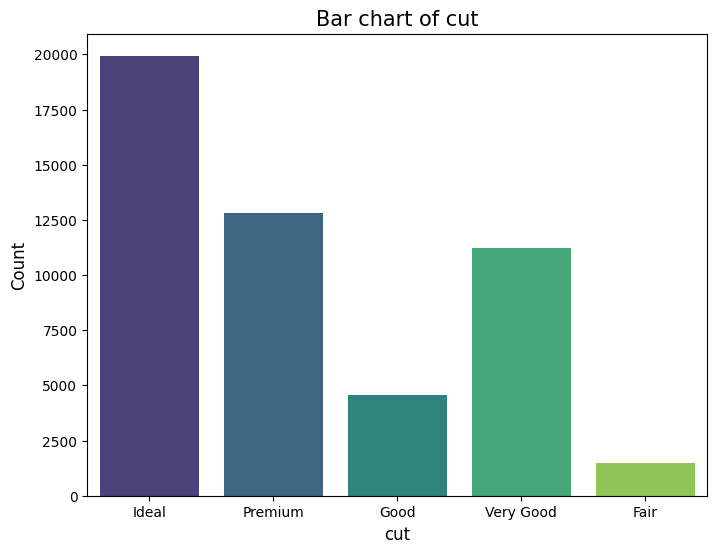

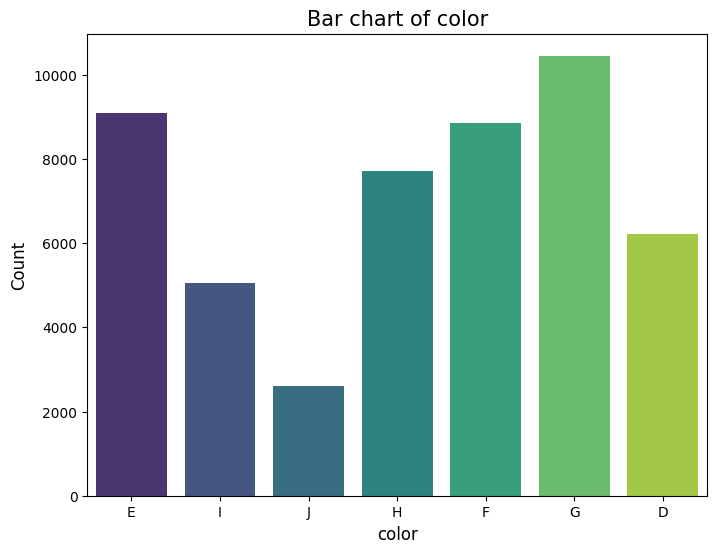

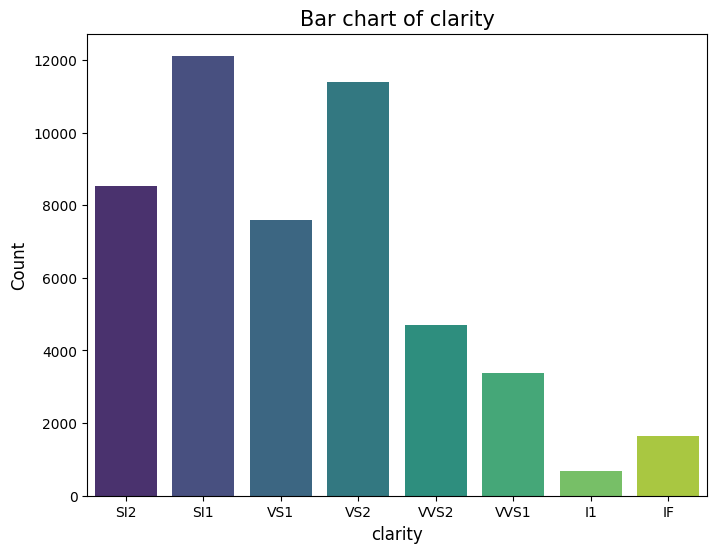

In [40]:
# Melakukan loop melalui setiap fitur kategori
for feature in categorical_features:
    # Membuat gambar (figure) untuk grafik
    plt.figure(figsize=(8, 6))

    # Menggunakan Seaborn untuk membuat grafik batang (countplot)
    sns.countplot(x=feature, data=datas, palette='viridis')

    # Menambahkan judul grafik
    plt.title(f'Bar chart of {feature}', size=15)

    # Menambahkan label sumbu-x
    plt.xlabel(feature, size=12)

    # Menambahkan label sumbu-y
    plt.ylabel('Count', size=12)

    # Menampilkan grafik
    plt.show()


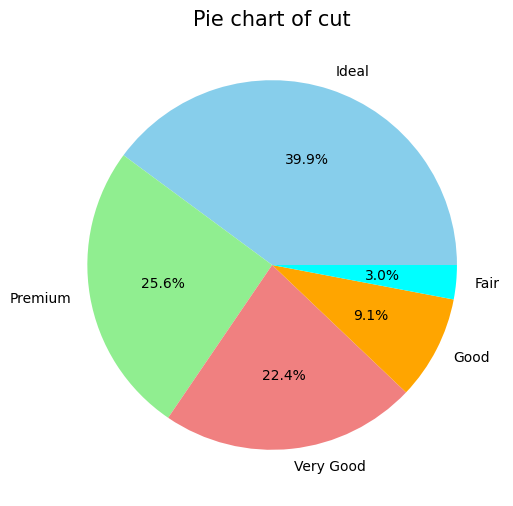

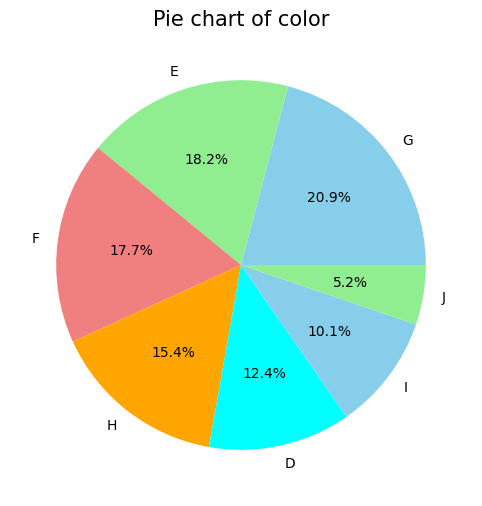

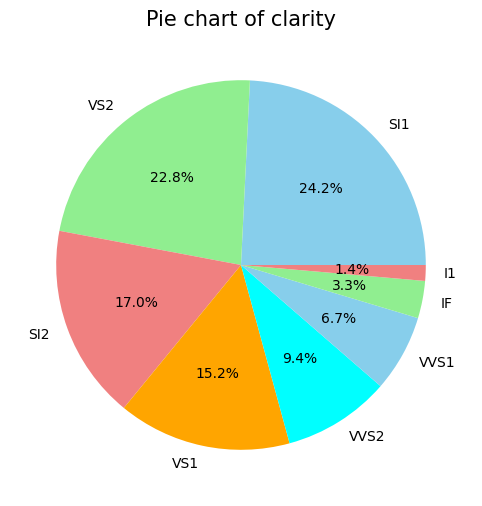

In [41]:
# Melakukan loop melalui setiap fitur kategori
for feature in categorical_features:
    # Membuat gambar (figure) untuk grafik
    plt.figure(figsize=(8, 6))

    # Menghitung jumlah masing-masing nilai kategori dan membuat grafik pai
    datas[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'aqua'])

    # Menambahkan judul grafik
    plt.title(f'Pie chart of {feature}', size=15)

    # Menghilangkan label sumbu-y (tidak diperlukan pada grafik pai)
    plt.ylabel('')

    # Menampilkan grafik
    plt.show()


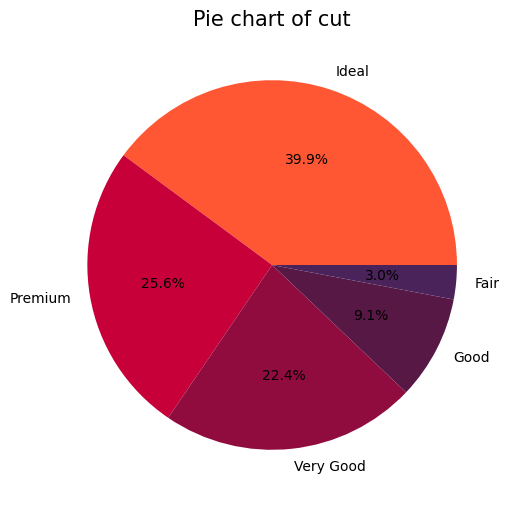

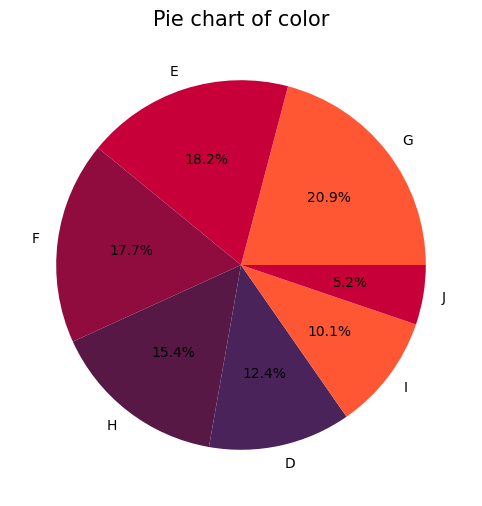

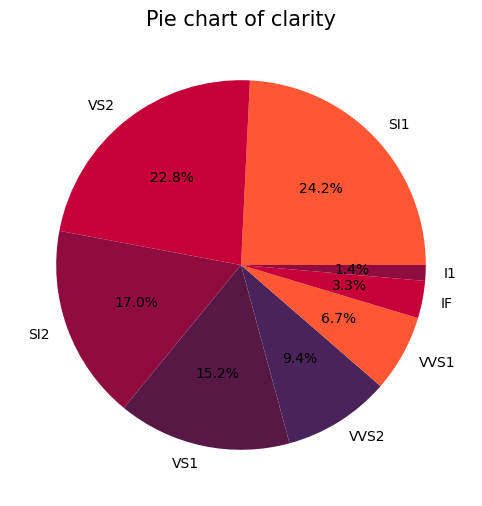

In [42]:
# Daftar warna yang lebih berani untuk grafik pai
bold_colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#4A235A']

# Melakukan loop melalui setiap fitur kategori
for feature in categorical_features:
    # Membuat gambar (figure) untuk grafik
    plt.figure(figsize=(8, 6))

    # Menghitung jumlah masing-masing nilai kategori dan membuat grafik pai dengan warna yang ditentukan
    datas[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=bold_colors)

    # Menambahkan judul grafik
    plt.title(f'Pie chart of {feature}', size=15)

    # Menghilangkan label sumbu-y (tidak diperlukan pada grafik pai)
    plt.ylabel('')

    # Menampilkan grafik
    plt.show()


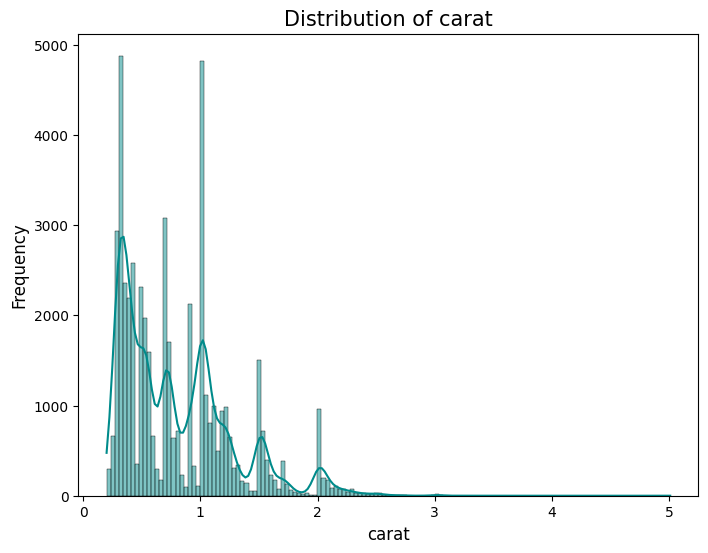

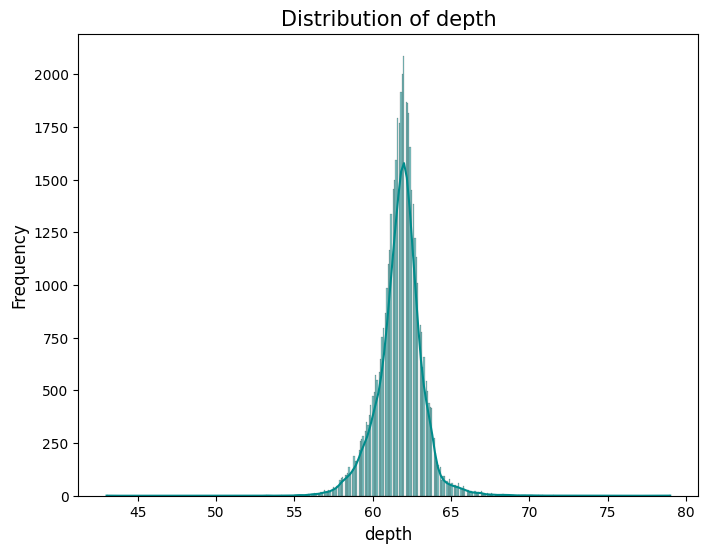

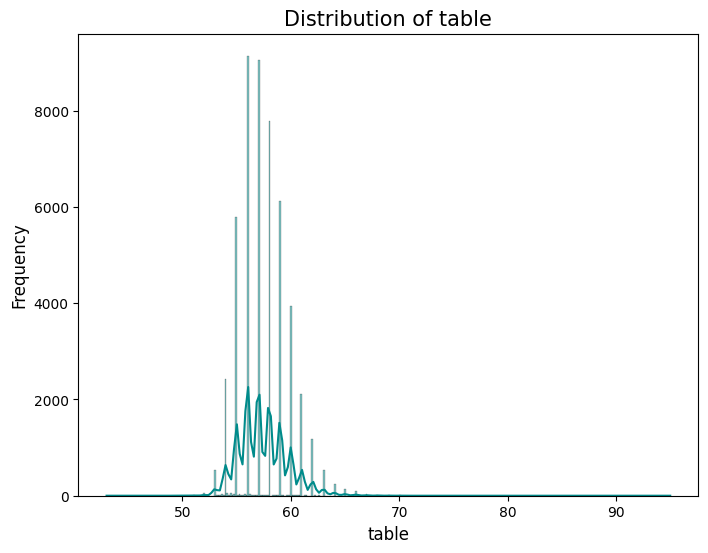

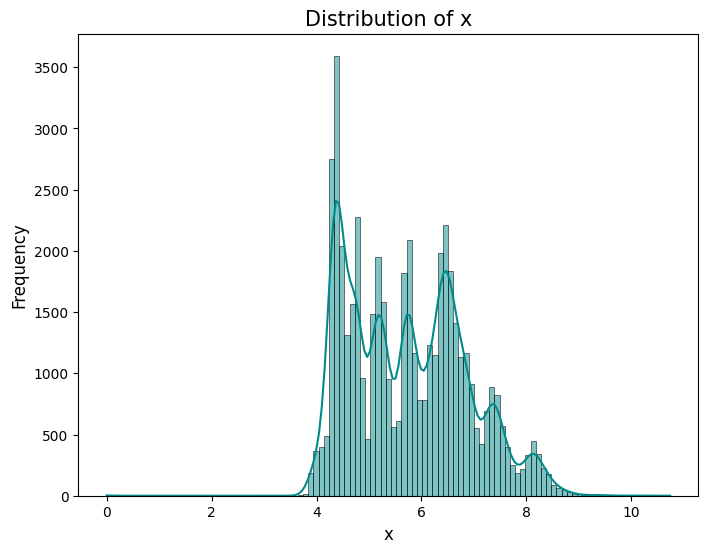

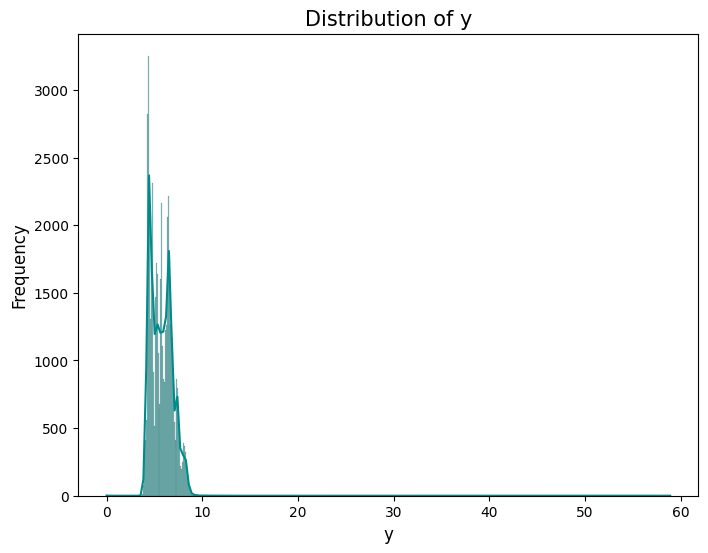

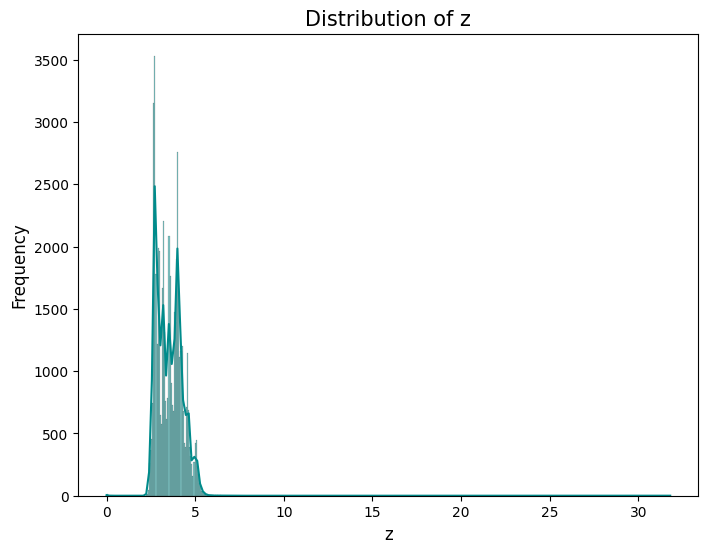

In [43]:
# Melakukan loop melalui setiap fitur numerik
for feature in numerical_features:
    # Membuat gambar (figure) untuk histogram
    plt.figure(figsize=(8, 6))

    # Menggunakan Seaborn untuk membuat histogram dengan estimasi kernel (KDE) diaktifkan
    sns.histplot(datas[feature], kde=True, color='darkcyan')

    # Menambahkan judul grafik
    plt.title(f'Distribution of {feature}', size=15)

    # Menambahkan label sumbu-x
    plt.xlabel(feature, size=12)

    # Menambahkan label sumbu-y
    plt.ylabel('Frequency', size=12)

    # Menampilkan grafik
    plt.show()


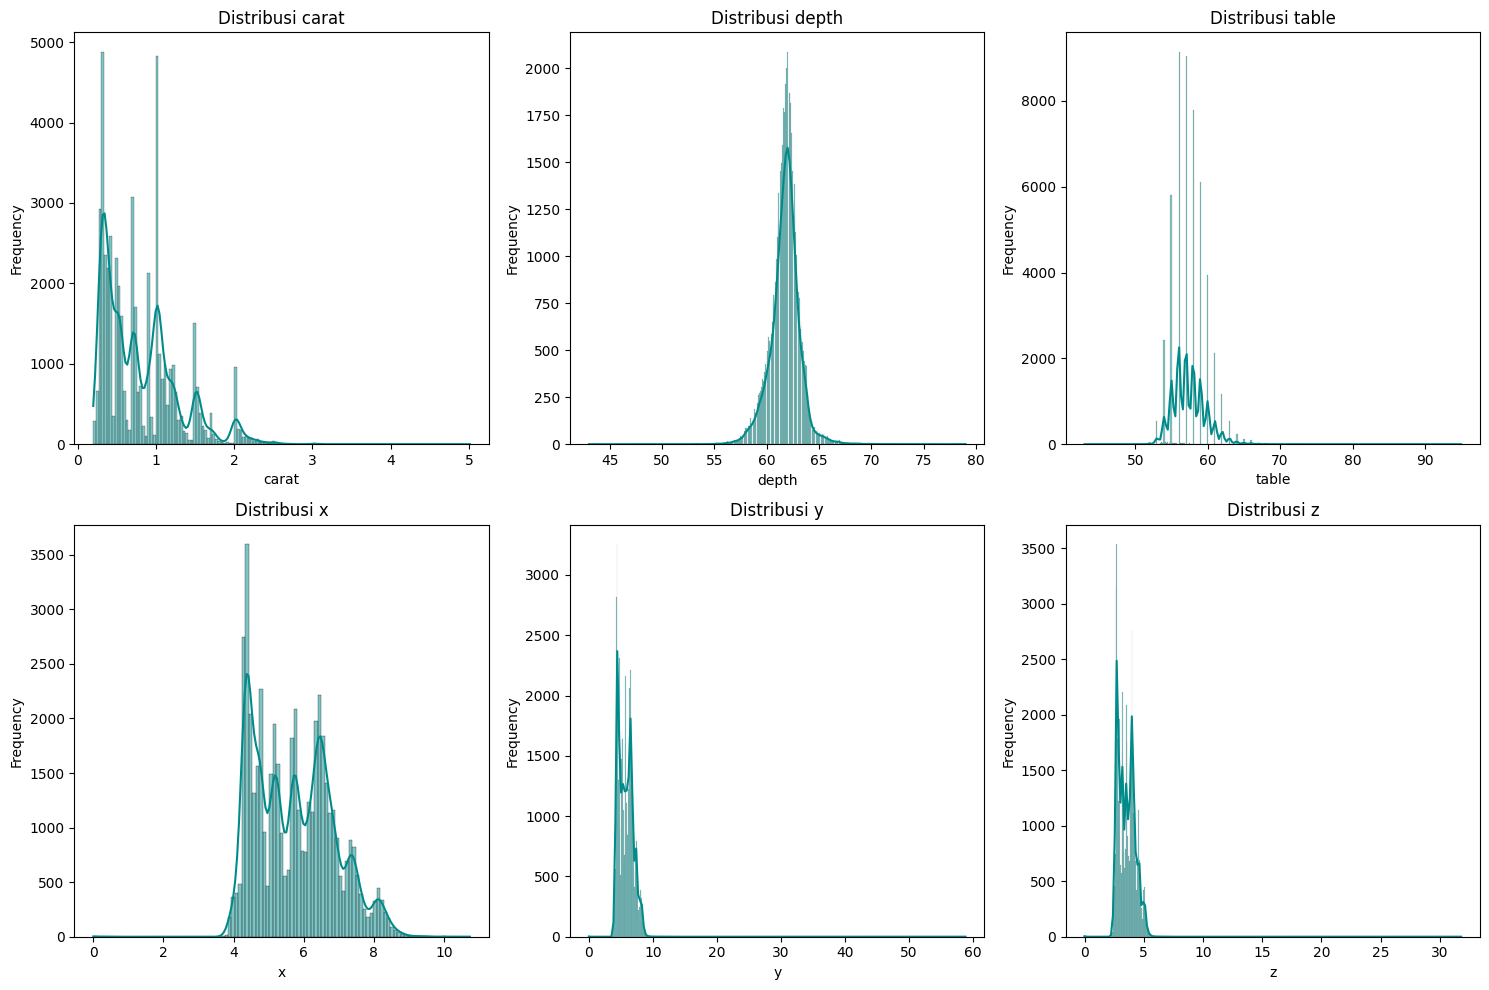

In [44]:
# Membuat gambar dan subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Melakukan loop melalui setiap fitur numerik
for i, feature in enumerate(numerical_features):
    # Menggunakan Seaborn untuk membuat histogram dengan estimasi kernel (KDE) diaktifkan pada subplot yang sesuai
    sns.histplot(datas[feature], kde=True, color='darkcyan', ax=axes[i//3, i%3])

    # Menambahkan judul pada subplot
    axes[i//3, i%3].set_title(f'Distribusi {feature}', size=12)

    # Menambahkan label sumbu-x pada subplot
    axes[i//3, i%3].set_xlabel(feature, size=10)

    # Menambahkan label sumbu-y pada subplot
    axes[i//3, i%3].set_ylabel('Frequency', size=10)

# Mengatur tata letak subplot agar rapi
plt.tight_layout()

# Menampilkan gambar dengan semua subplot
plt.show()


In [45]:
# Mendefinisikan fungsi untuk membuat histogram interaktif
def plot_histogram(feature, bin_width):
    plt.figure(figsize=(8, 6))

    # Menghitung batas bin berdasarkan lebar bin yang dipilih
    bins = np.arange(min(datas[feature]), max(datas[feature]) + bin_width, bin_width)

    # Menggunakan Seaborn untuk membuat histogram dengan estimasi kernel (KDE) dan batas bin yang disesuaikan
    sns.histplot(datas[feature], kde=True, bins=bins, color='darkcyan')

    # Menambahkan judul histogram
    plt.title(f'Histogram of {feature}', size=15)

    # Menambahkan label sumbu-x
    plt.xlabel(feature, size=12)

    # Menambahkan label sumbu-y
    plt.ylabel('Frequency', size=12)

    # Menampilkan histogram
    plt.show()

# Melakukan loop melalui setiap fitur numerik
for feature in numerical_features:
    # Membuat elemen interaktif untuk mengatur lebar bin
    interact(plot_histogram, feature=widgets.fixed(feature), bin_width=(0.1, 1, 0.1))


interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

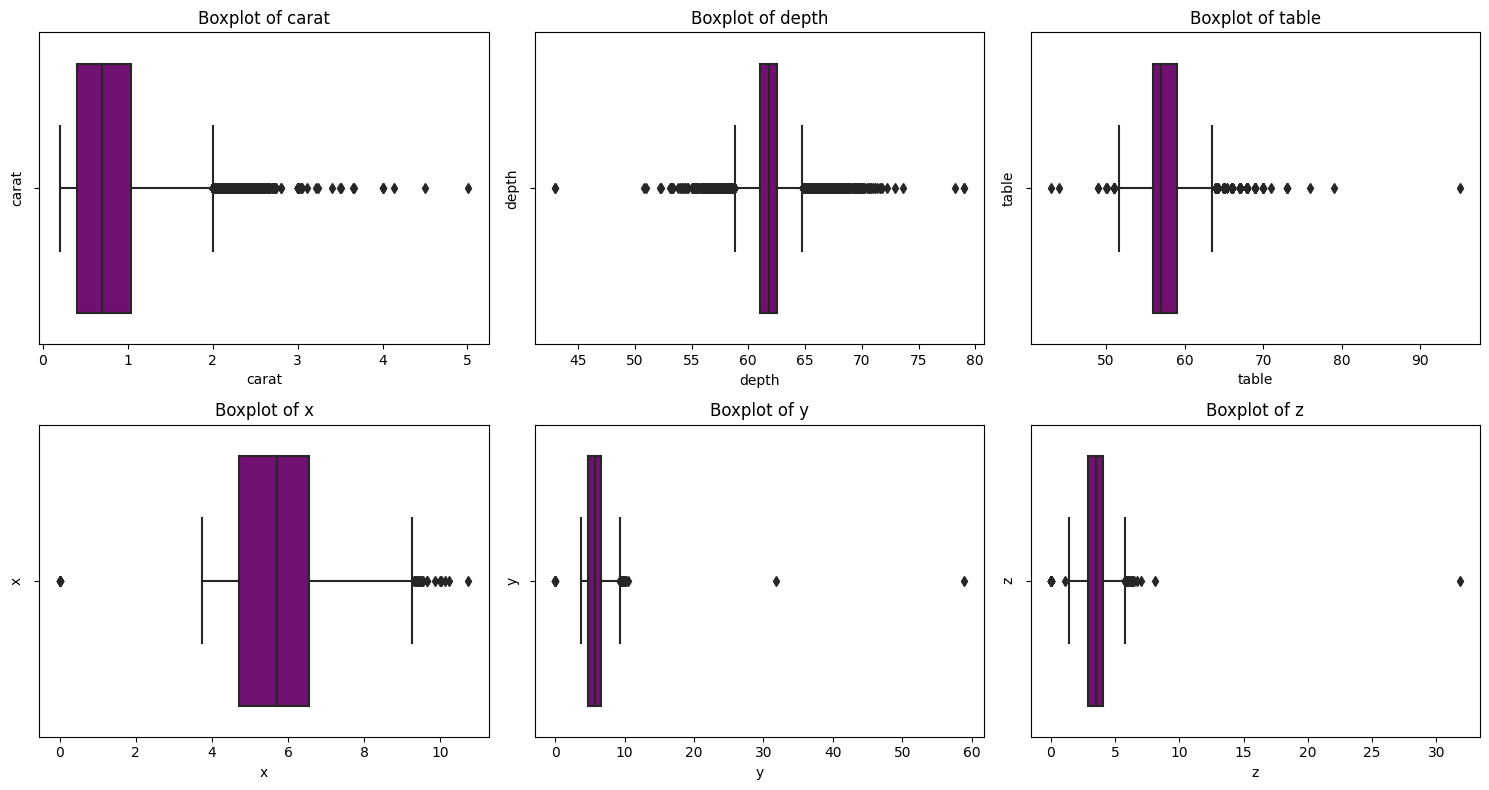

In [46]:
# Membuat gambar dan subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Melakukan loop melalui setiap fitur numerik
for i, feature in enumerate(numerical_features):
    # Menggunakan Seaborn untuk membuat boxplot dengan orientasi horizontal (orient='h') pada subplot yang sesuai
    sns.boxplot(x=datas[feature], ax=axes[i//3, i%3], orient='h', color='purple')

    # Menambahkan judul pada subplot
    axes[i//3, i%3].set_title(f'Boxplot of {feature}', size=12)

    # Menambahkan label sumbu-y pada subplot
    axes[i//3, i%3].set_ylabel(feature, size=10)

# Mengatur tata letak subplot agar rapi
plt.tight_layout()

# Menampilkan gambar dengan semua subplot
plt.show()
